# **Tarea 1: Red neural**
Materia: Proyecto II

Profesora: María Fernanda Sánchez Puig

Ayudante: Sergio Miguel Fernández Martínez

In [ ]:
import torch
import matplotlib
import pandas as pd
import numpy as np
from torch import nn
from torch import optim
from progressbar import ProgressBar
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import sklearn.preprocessing 

matplotlib.style.use('ggplot')

In [ ]:
url = 'https://raw.githubusercontent.com/HendrixOB/ProyectoII/main/ConjuntoDeDatos/default_of_credit_card_clients.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# **Analisis del conjuto**

Tenemos 25 varibles en el conjunto, las cuales son:
* X0: Id del cliente
* X1: Monto del crédito otorgado en dólar
* X2: El género
  * Masculino = 1
  * Femenino = 2
* X3: Nivel de educación.
  * Posgrado = 1
  * Universidad = 2
  * Bachillerato = 3
  * Otro = 4
* X4 :  Estado civil
  * Casado = 1
  * Soltero = 2
  * Otro = 3
* X5: Edad
* X6: El estado de pago en septiembre de 2005	
* X7: El estado de pago en agosto de 2005	
* X8: El estado de pago en julio de 2005
* X9:	El estado de pago en junio de 2005
* X10: El estado de pago en mayo de 2005
* X11: El estado de pago en abril de 2005
  * De X6 -X11: 
    * Pago debidamente= -1 R
    * Retraso en el pago durante un mes = 1
    * Retraso en el pago durante dos meses = 2
    * … 
    * Retraso en el pago durante ocho meses = 8
    * Retraso en el pago durante nueve meses o más = 9
* X12: Monto del estado de cuenta en septiembre de 2005
* X13: Monto del estado de cuenta en agosto de 2005
* X14: Monto del estado de cuenta en julio de 2005
* X15: Monto del estado de cuenta en junio de 2005
* X16: Monto del estado de cuenta en mayo de 2005
* X17: Monto del estado de cuenta en abril de 2005
* X18: Monto pagado en septiembre de 2005
* X19: Monto pagado en agosto de 2005
* X20: Monto pagado en julio de 2005
* X21: Monto pagado en junio de 2005
* X22: Monto pagado en mayo de 2005
* X23: Monto pagado en abril de 2005
* Y: pago predeterminado (1 = sí, 0 = no)



**Descrripción de la base:** Esta investigación tuvo como objetivo el caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de extracción de datos.

In [ ]:
#Vemos si hay contenido nulo
pd.DataFrame(data.isnull().sum(), columns=["Contenido nulo"])

,Contenido nulo
Unnamed: 0,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


In [ ]:
#Comprobamos el tipo de nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
#Eliminamos la primera fila
data = data.iloc[1:,:]

# **Ajustes del conjunto de datos**

En este caso nosotros modificaremos algunas cosas parar tener un mejor entendimiento de nuestro trabajo, primero renombraremos una columna, para así reconocerla.

Después cambiamos los tipos de nuestras variables segun lo que describimos

In [ ]:
data = data.rename(columns={'Unnamed: 0': 'ID'})

In [ ]:
data['ID'] = data['ID'].astype(str).astype(int)
data['X1'] = data['X1'].astype(str).astype(float)
for value in data.columns[2:12]:
  data[value] = data[value].astype(str).astype(int)
for value in data.columns[12:23]:
  data[value] = data[value].astype(str).astype(float)
data['Y'] = data['Y'].astype(str).astype(int)

In [ ]:
#Comprobamos el tipo de nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  float64
 2   X2      30000 non-null  int64  
 3   X3      30000 non-null  int64  
 4   X4      30000 non-null  int64  
 5   X5      30000 non-null  int64  
 6   X6      30000 non-null  int64  
 7   X7      30000 non-null  int64  
 8   X8      30000 non-null  int64  
 9   X9      30000 non-null  int64  
 10  X10     30000 non-null  int64  
 11  X11     30000 non-null  int64  
 12  X12     30000 non-null  float64
 13  X13     30000 non-null  float64
 14  X14     30000 non-null  float64
 15  X15     30000 non-null  float64
 16  X16     30000 non-null  float64
 17  X17     30000 non-null  float64
 18  X18     30000 non-null  float64
 19  X19     30000 non-null  float64
 20  X20     30000 non-null  float64
 21  X21     30000 non-null  float64
 22

# **Visualización**

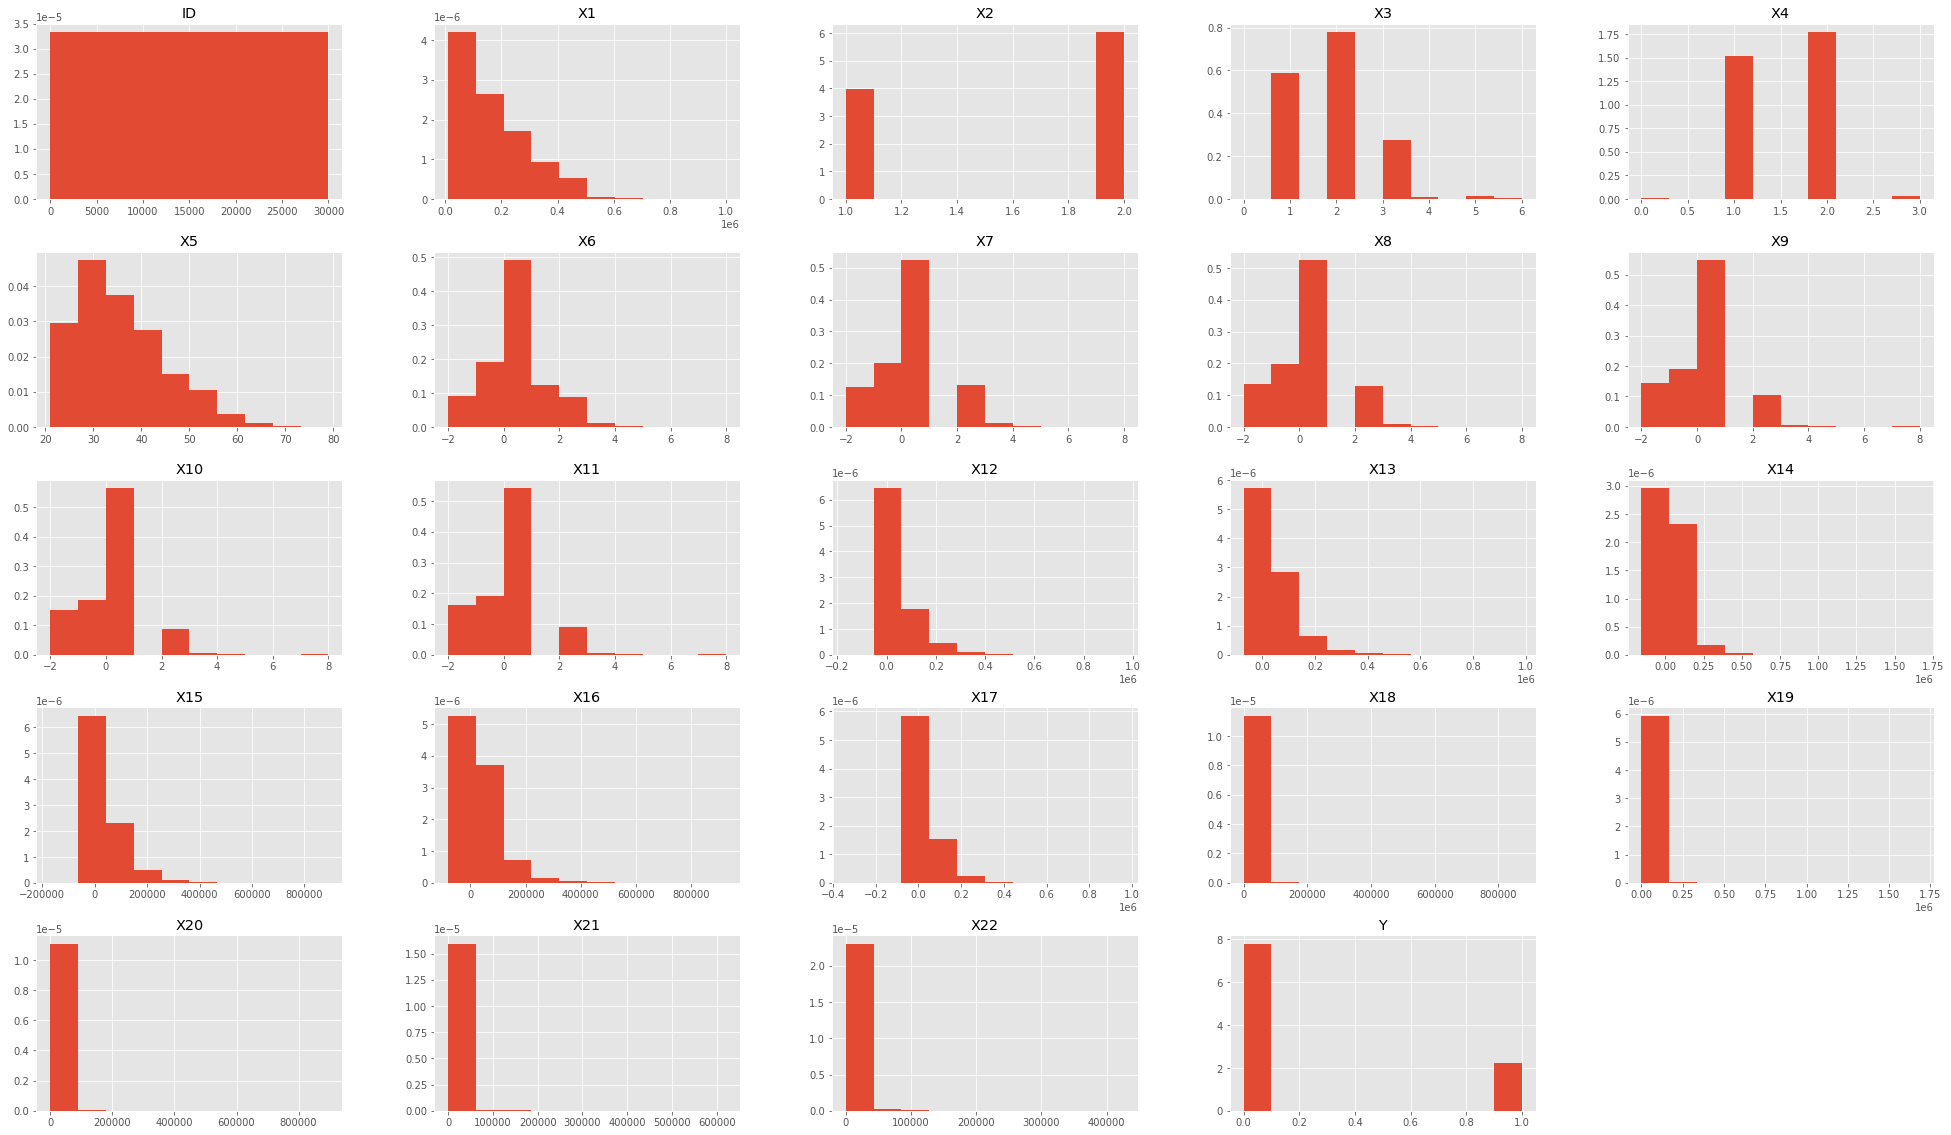

In [ ]:
%matplotlib inline
data.hist(figsize=[34,20], bins=10, density = True)
plt.show()

Hacemos que nuestro datos de entrenamiento sean del 40%

In [ ]:
X = data.drop('Y', axis=1).values
y = data['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler=sklearn.preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

Necesitamos a $y$ como un tensor de columna, por lo que usamos view

In [ ]:
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

In [ ]:
train_set = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

Dividimos nuestro *test_data* en dos para tener datos de validación

In [ ]:
msk = np.random.rand(len(test_dataset)) < 0.6
val_set = torch.utils.data.Subset(test_dataset, np.where(msk)[0])
test_set = torch.utils.data.Subset(test_dataset, np.where(~msk)[0])

# **DataLoader**

Marcamos nuestros batches

In [ ]:
n_train = len(train_set)
n_val = len(val_set)
n_test = len(test_set)
batch_size = 1
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=n_test)

# **Regresión Logistica**

Nuestra variable respuesta es de forma categórica, por lo que haremos una regresión logistica

In [ ]:
class Logistic_Reg_model(torch.nn.Module):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.layer1=torch.nn.Linear(no_input_features,20)
   self.layer2=torch.nn.Linear(20,1)
 def forward(self,x):
   y_predicted=self.layer1(x)
   y_predicted=torch.sigmoid(self.layer2(y_predicted))
   return y_predicted

In [ ]:
n_samples, n_features = X.shape
model=Logistic_Reg_model(n_features)

# **Función objetivo y optimizador.**

En este caso usaremos una función de perdida Binary Cross-Entropy (BCE)
$$H_{p}(q) = - \frac{1}{N} \sum_{i=1}^{N} y_{i} \cdot log(p(y_{i}))+(1-y_{i}) \cdot log(1-p(y_{i}))$$

donde $y$ es la variable respuesta (para 1 y 0 ) y $p(y)$ es la probabilidad predicha de que $y=1$ para los $N$ datos.
Al leer esta fórmula para  $y = 1$, agrega $log (p (y))$ a la pérdida, es decir, la probabilidad logarítmica de que sea la etiqueta de 1 . Por el contrario, agrega $log (1-p (y))$ , es decir, la probabilidad logarítmica de que sea la etiqueta de 0 $( y = 0 )$.

In [ ]:
cost=torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.0, nesterov=False)

# **Entrenamiento**

In [ ]:
number_of_epochs=100
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=cost(y_prediction,y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%10 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())


epoch: 10 ,loss= 0.7652053236961365
epoch: 20 ,loss= 0.7427070140838623
epoch: 30 ,loss= 0.7228108644485474
epoch: 40 ,loss= 0.7050705552101135
epoch: 50 ,loss= 0.6891393065452576
epoch: 60 ,loss= 0.6747441291809082
epoch: 70 ,loss= 0.6616668701171875
epoch: 80 ,loss= 0.6497311592102051
epoch: 90 ,loss= 0.6387930512428284
epoch: 100 ,loss= 0.6287332773208618


Text(0, 0.5, 'cost')

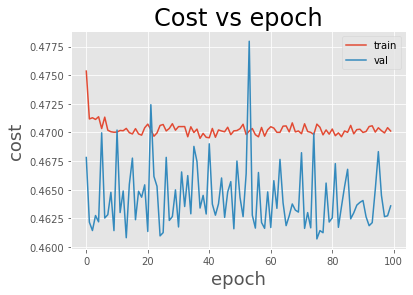

In [ ]:
def update_parameters(model, dataloader, optimizer, criterion, train=True):
  running_loss = 0.0
  for i, data in enumerate(dataloader, 0):
    X, Y = data
    n = len(X)
    #X = X.reshape((n, model.in_features)) # -> Corrección de tamaño, sólo es necesario en dim=1
    m = len(Y)
    Y = Y.reshape((m, 1)) # -> Corrección de tamaño
    if train:
      optimizer.zero_grad() # reinicia el gradiente
    pred = model(X) # forward pass 
    loss = cost(pred, Y) # evaluación de predicción
    if train:
      loss.backward() # cálcula las derivadas 
      optimizer.step() # paso de optimización 

    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
  return avg_loss
train_losses = list(); val_losses = list()
val = True
for epoch in range(number_of_epochs):
    train_loss = update_parameters(model, train_dataloader, optimizer, cost)
    train_losses.append(train_loss)
    if val:
      val_loss = update_parameters(model, val_dataloader, None, cost, train=False)
      val_losses.append(val_loss)

plt.plot(train_losses)
if val:
    plt.plot(val_losses)
    plt.legend(['train', 'val'], loc='upper right')
plt.title('Cost vs epoch', size=24)
plt.xlabel('epoch', size=18)
plt.ylabel('cost', size=18)

In [ ]:
with torch.no_grad():
 y_pred=model(X_test)
 y_pred_class=y_pred.round()
 accuracy=(y_pred_class.eq(y_test).sum())/float(y_test.shape[0])
 print(accuracy.item())

0.8090000152587891
